# Analyse des données issues des ventes en ligne de l'entreprise 

In [144]:
# importation des librairies 
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import locale

In [145]:
# lecture des fichiers csv 
df_vente = pd.read_csv('ventes.csv')
df_client = pd.read_csv('clients.csv')
df_produit = pd.read_csv('produits.csv')

In [146]:
# exploration des données grâce à .info() et .head()

In [147]:
df_vente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


In [148]:
df_vente.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [149]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [150]:
df_client.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [151]:
df_produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [152]:
df_produit.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


## Mission n° 1 : Nettoyage des données 

### Valeurs manquantes : 

In [153]:
df_vente.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [154]:
df_client.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [155]:
df_produit.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

###  Il n'y a pas de valeurs manquantes dans ces 3 fichiers.

### Duplicates : 

In [156]:
df_client.duplicated('client_id').value_counts()

False    8623
dtype: int64

In [157]:
df_produit.duplicated('id_prod').value_counts()

False    3287
dtype: int64

In [158]:
# On remarque qu'il y a des duplicates dans ce dataframe
df_vente.duplicated(subset=None).value_counts()

False    336890
True        126
dtype: int64

In [159]:
# Visualisation des duplicates pour mieux les comprendres et savoir si on doit supprimer les lignes
df_vente.sort_values("date")
bool_series = df_vente["date"].duplicated()
df_vente[bool_series].head(5)

,id_prod,date,session_id,client_id
27161,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_0
34387,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
48425,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
54813,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
56373,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0


In [19]:
# Visualisation du produit T_0 dans la dataframe produit
df_produit.loc[df_produit['id_prod'] == 'T_0']

,id_prod,price,categ
731,T_0,-1.0,0


In [20]:
# Les duplicates de la dataframe df_vente, sont des tests effectués le 2021-03-01, ils ne sont pas intéréssant pour nos statistiques de vente, on peut donc les supprimer 
df_vente.drop(df_vente.index[df_vente['id_prod'] == 'T_0'], inplace = True)

In [21]:
# Vérification de la disparition des duplicates
df_vente.duplicated(subset=None).value_counts()

False    336816
dtype: int64

### Outliers

In [161]:
#On supprime les produits qui ont une valeurs négatives (le fameux T_0)
df_produit.drop(df_produit.index[df_produit['price'] < 0], inplace = True)

In [162]:
# Vérification qu'il n'y ai pas de valeurs abbérantes pour le sexe, on doit obtenir just f ou m.
df_client.sex.value_counts()

f    4491
m    4132
Name: sex, dtype: int64

<AxesSubplot:>

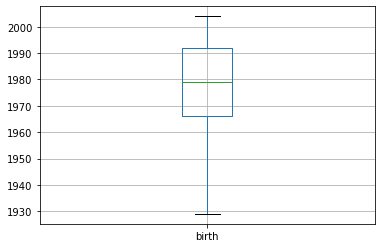

In [163]:
# Vérification visuelle de valeurs abérantes pour les années de naissances
df_client[['birth']].boxplot()

<AxesSubplot:>

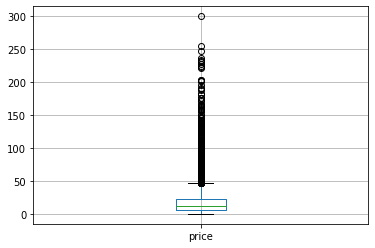

In [164]:
# Vérification visuelle de valeurs abérantes pour les prix
df_produit[['price']].boxplot()

In [26]:
# On peut maintenant joindre nos tables produit et client sur la table vente pour augmenter les informations sur les ventes
df_vente_produit = df_vente.merge(df_produit,how='left')

In [27]:
df_vente_produit

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0
...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0


In [28]:
df_all = df_vente_produit.merge(df_client, how='left')

In [29]:
# On vérifie sur toute les lignes on bien étées remplies 
df_nan = df_all[df_all.isna().any(axis=1)]
df_nan

,id_prod,date,session_id,client_id,price,categ,sex,birth
6231,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,NaN,m,1972
10797,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,NaN,m,1973
14045,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,NaN,f,1975
17480,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,NaN,f,1982
21071,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,NaN,m,1988
...,...,...,...,...,...,...,...,...
322523,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,NaN,f,1979
329226,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,NaN,f,1983
330297,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,NaN,f,1984
335331,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,NaN,f,1973


In [30]:
# Pour 103 lignes nous n'avons pas de valeurs price et categ
df_nan.id_prod.value_counts()

0_2245    103
Name: id_prod, dtype: int64

In [31]:
# On se rend compte que ce produit n'est pas enregistré dans la dataframe produit
df_produit.loc[df_produit['id_prod'] == '0_2245']

,id_prod,price,categ


In [32]:
# Je ne sais pas trop si je dois éliminer ces lignes, je créer une seconde dataframe sans ces valeurs
df_without_nan = df_all.dropna()
df_without_nan

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980
...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994


In [33]:
df_without_nan[df_all.isna().any(axis=1)]

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_5804\3718480314.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_without_nan[df_all.isna().any(axis=1)]


,id_prod,date,session_id,client_id,price,categ,sex,birth


## Création de nouvelles colonnes

In [34]:
# extraction de l'année, la date, les jours, le mois, l'heure à partir de la colonne date
locale.setlocale(locale.LC_ALL, 'fr_FR')

df_all['day'] = pd.DatetimeIndex(df_all.date).strftime('%A')
df_all['month'] = pd.DatetimeIndex(df_all.date).strftime('%B')
df_all['hour'] = pd.DatetimeIndex(df_all.date).strftime('%H:%M')
df_all['year'] = pd.DatetimeIndex(df_all.date).strftime('%Y')
df_all['date_2'] = pd.DatetimeIndex(df_all.date).strftime('%d/%m/%Y')
df_all['hours'] = pd.DatetimeIndex(df_all.date).strftime('%H')

In [35]:
# Changement du type de la colonne year pour pouvoir faire des opérations
df_all['year'] = pd.to_numeric(df_all['year'])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     336816 non-null  object 
 1   date        336816 non-null  object 
 2   session_id  336816 non-null  object 
 3   client_id   336816 non-null  object 
 4   price       336713 non-null  float64
 5   categ       336713 non-null  float64
 6   sex         336816 non-null  object 
 7   birth       336816 non-null  int64  
 8   day         336816 non-null  object 
 9   month       336816 non-null  object 
 10  hour        336816 non-null  object 
 11  year        336816 non-null  int64  
 12  date_2      336816 non-null  object 
 13  hours       336816 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 46.6+ MB


In [52]:
# extraction de l'année, la date, les jours, le mois, l'heure à partir de la colonne date
locale.setlocale(locale.LC_ALL, 'fr_FR')

df_without_nan['day'] = pd.DatetimeIndex(df_without_nan.date).strftime('%A')
df_without_nan['month'] = pd.DatetimeIndex(df_without_nan.date).strftime('%B')
df_without_nan['hour'] = pd.DatetimeIndex(df_without_nan.date).strftime('%H:%M')
df_without_nan['year'] = pd.DatetimeIndex(df_without_nan.date).strftime('%Y')
df_without_nan['date_2'] = pd.DatetimeIndex(df_without_nan.date).strftime('%d/%m/%Y')
df_without_nan['hours'] = pd.DatetimeIndex(df_without_nan.date).strftime('%H')
df_without_nan['year'] = pd.to_numeric(df_without_nan['year'])
df_without_nan['age'] = df_without_nan.year - df_without_nan.birth
df_without_nan

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_5804\428232876.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_nan['day'] = pd.DatetimeIndex(df_without_nan.date).strftime('%A')
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_5804\428232876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_nan['month'] = pd.DatetimeIndex(df_without_nan.date).strftime('%B')
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_5804\428232876.py:6: SettingWithCopyWarning: 
A value is trying to be se

,id_prod,date,session_id,client_id,price,categ,sex,birth,day,month,hour,year,date_2,hours,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,samedi,avril,18:37,2021,10/04/2021,18,44
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,jeudi,février,01:55,2022,03/02/2022,01,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,jeudi,septembre,15:13,2021,23/09/2021,15,42
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,dimanche,octobre,03:27,2021,17/10/2021,03,58
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,samedi,juillet,20:34,2021,17/07/2021,20,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969,vendredi,mai,12:35,2021,28/05/2021,12,52
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991,samedi,juin,00:19,2021,19/06/2021,00,30
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968,mardi,mars,17:31,2021,16/03/2021,17,53
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994,samedi,octobre,16:50,2021,30/10/2021,16,27


min    17
max    93
Name: age, dtype: int64

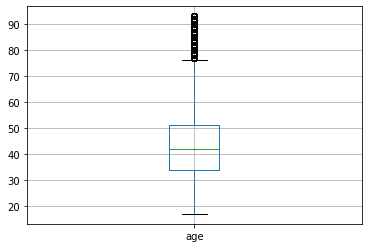

In [36]:
# Création de la colonne age à parir de la date de naissance et de la date de commande
df_all['age'] = df_all.year - df_all.birth
df_all[['age']].boxplot()
df_all.age.agg(['min', 'max'])

## Mission n° 2 : Analyses des données 


    • des représentations graphiques, dont au moins un histogramme, une représentation avec des "boîtes à moustaches", et une représentation de série temporelle (c’est-à-dire un graphique dont l’axe des abscisses représente des dates) ;
    • des analyses bivariées.

### Indicateurs de tendances centrale (mean, median=quartilles 50%) et de dispersion (std, quartilles):

In [37]:
#pd.set_option('display.float_format', lambda x: '%.3f' % x) --> pour définir le nombre de virgule sur tout les output pandas
stats = df_all.describe().applymap('{:.1f}'.format)
stats

,price,categ,birth,year,age
count,336713.0,336713.0,336816.0,336816.0,336816.0
mean,17.2,0.4,1977.8,2021.2,43.4
std,17.9,0.6,13.5,0.4,13.5
min,0.6,0.0,1929.0,2021.0,17.0
25%,8.6,0.0,1971.0,2021.0,34.0
50%,13.9,0.0,1980.0,2021.0,42.0
75%,19.0,1.0,1987.0,2021.0,51.0
max,300.0,2.0,2004.0,2022.0,93.0


### Analyse de concentration (via une courbe de Lorenz et un indice de Gini)

In [38]:
df_all

,id_prod,date,session_id,client_id,price,categ,sex,birth,day,month,hour,year,date_2,hours,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977,samedi,avril,18:37,2021,10/04/2021,18,44
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,65.75,2.0,f,2000,jeudi,février,01:55,2022,03/02/2022,01,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,10.71,1.0,f,1979,jeudi,septembre,15:13,2021,23/09/2021,15,42
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,4.20,0.0,m,1963,dimanche,octobre,03:27,2021,17/10/2021,03,58
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,8.99,0.0,f,1980,samedi,juillet,20:34,2021,17/07/2021,20,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336811,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,31.99,1.0,m,1969,vendredi,mai,12:35,2021,28/05/2021,12,52
336812,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,22.99,0.0,m,1991,samedi,juin,00:19,2021,19/06/2021,00,30
336813,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,11.03,0.0,f,1968,mardi,mars,17:31,2021,16/03/2021,17,53
336814,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,50.99,2.0,f,1994,samedi,octobre,16:50,2021,30/10/2021,16,27


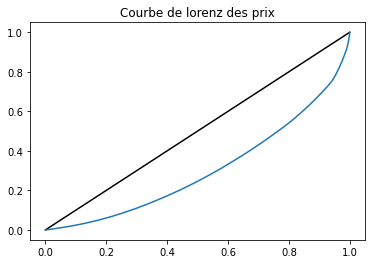

In [136]:
dep = df_without_nan.price
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) 
# La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1)
#Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot([0,1], [0,1], color='k')
plt.plot(xaxis,lorenz)
plt.title("Courbe de lorenz des prix")
plt.show()

In [137]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
# Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC 
# surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.392145510890881

### Représentations graphiques (histogramme, "boîtes à moustaches", courbe...)

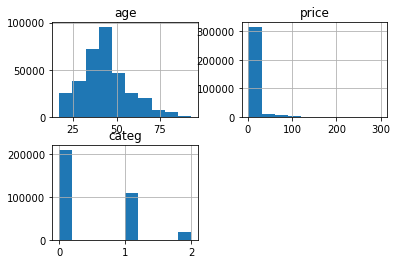

In [39]:
# Visualisation de la distribution pour l'âge, le prix et la catégorie
hist = df_all[['age','price', 'categ']].hist()

La catégorie 0 est très représentée alors que la catégorie 2 est très peu représentée. 
La majorité des prix se situent en dessous de 50 euros. 
La tranche d'âge la plus représentée est entre 30 et 40 ans.

In [40]:
by_month = df_all.groupby('month').sum()
by_month

,price,categ,birth,year,age
month,,,,,
août,479305.19,11850.0,50682958,51775999,1093041
avril,472980.72,10581.0,56208404,57426715,1218311
décembre,522937.68,14011.0,64105560,65528904,1423344
février,532740.88,14129.0,58480719,59784474,1303755
janvier,522955.31,15300.0,57966524,59276952,1310428
juillet,480898.66,13125.0,48894264,49951036,1056772
juin,481257.94,12602.0,53048034,54201199,1153165
mai,489367.95,11413.0,55867629,57083145,1215516
mars,479312.03,11764.0,56502988,57735928,1232940


,price,categ,birth,year,age
count,12.000000,12.000000,1.200000e+01,1.200000e+01,1.200000e+01
mean,483048.147500,12069.916667,5.551355e+07,5.673033e+07,1.216788e+06
std,55570.673098,2985.430575,6.273052e+06,6.424574e+06,1.521231e+05
min,319159.960000,3986.000000,4.271185e+07,4.362126e+07,9.094120e+05
25%,479310.320000,11313.750000,5.245676e+07,5.359490e+07,1.138134e+06
50%,485312.945000,12226.000000,5.606203e+07,5.728727e+07,1.225236e+06
75%,515402.047500,14040.500000,5.809507e+07,5.940383e+07,1.305423e+06
max,532740.880000,15300.000000,6.577798e+07,6.723059e+07,1.452608e+06


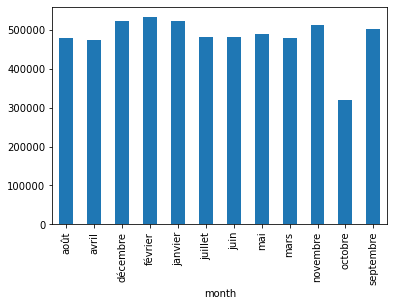

In [138]:
by_month.price.plot.bar()
by_month.describe()

Les ventes sont assez constante en fonction des mois de l'année, on peut observer une chute en octobre. 

count         7.000000
mean     828082.538571
std        9416.390794
min      818148.040000
25%      820996.635000
50%      824991.600000
75%      834289.440000
max      842865.980000
Name: price, dtype: float64

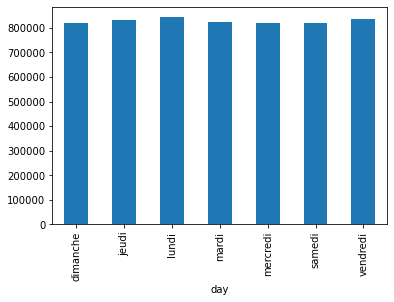

In [42]:
by_day = df_all.groupby('day').sum()
by_day
by_day.price.plot.bar()
by_day.price.describe()

count        24.000000
mean     241524.073750
std        2680.338486
min      237318.670000
25%      239791.892500
50%      242007.825000
75%      242917.505000
max      246442.500000
Name: price, dtype: float64

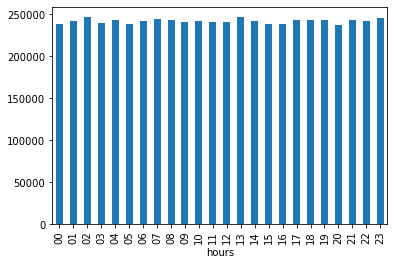

In [43]:
by_hour = df_all.groupby('hours').sum()
by_hour
by_hour.price.plot.bar()
by_hour.price.describe()

## Mission n° 3 : Corrélations

    1. Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
    2. Y a-t-il une corrélation entre l'âge des clients et :

        ◦ Le montant total des achats ;
        ◦ La fréquence d’achat (ie. nombre d'achats par mois par exemple) ;
        ◦ La taille du panier moyen (en nombre d’articles) ;
        ◦ Les catégories de produits achetés.

In [49]:
df_all.corr()

,price,categ,birth,year,age
price,1.000000,0.673359,0.211529,0.018519,-0.210882
categ,0.673359,1.000000,0.098612,0.054330,-0.097028
birth,0.211529,0.098612,1.000000,-0.007475,-0.999606
year,0.018519,0.054330,-0.007475,1.000000,0.035538
age,-0.210882,-0.097028,-0.999606,0.035538,1.000000


In [53]:
df_without_nan.corr()

,price,categ,birth,year,age
price,1.000000,0.673359,0.211529,0.018519,-0.210882
categ,0.673359,1.000000,0.098612,0.054330,-0.097028
birth,0.211529,0.098612,1.000000,-0.007503,-0.999606
year,0.018519,0.054330,-0.007503,1.000000,0.035565
age,-0.210882,-0.097028,-0.999606,0.035565,1.000000


In [59]:
by_client = df_all.groupby('client_id').mean()
by_client

,price,categ,birth,year,age
client_id,,,,,
c_1,15.032500,0.300000,1955.0,2021.050000,66.050000
c_10,20.935000,0.678571,1956.0,2021.000000,65.000000
c_100,37.145000,0.833333,1992.0,2021.000000,29.000000
c_1000,17.500357,0.642857,1966.0,2021.250000,55.250000
c_1001,19.007759,0.275862,1982.0,2021.155172,39.155172
...,...,...,...,...,...
c_995,14.885000,0.375000,1955.0,2021.000000,66.000000
c_996,17.609524,0.595238,1970.0,2021.095238,51.095238
c_997,24.908261,0.826087,1994.0,2021.173913,27.173913


In [56]:
by_client_age = df_all.groupby(['client_id', 'age']).sum()
by_client_age

price  categ  birth   year
client_id age                              
c_1       66    294.66    6.0  37145  38399
          67      5.99    0.0   1955   2022
c_10      65    586.18   19.0  54768  56588
c_100     29    222.87    5.0  11952  12126
c_1000    55    701.85   24.0  82572  84882
...                ...    ...    ...    ...
c_997     28     59.11    2.0   7976   8088
c_998     20   1101.86   28.0  48024  48504
          21    425.83    8.0   8004   8088
c_999     57    226.60    8.0  33388  34357
          58     78.40    3.0   9820  10110

[15799 rows x 4 columns]

In [57]:
df_all.groupby(['client_id'])['price'].sum()

client_id
c_1        300.65
c_10       586.18
c_100      222.87
c_1000     980.02
c_1001    1102.45
           ...   
c_995      119.08
c_996      739.60
c_997      572.89
c_998     1527.69
c_999      305.00
Name: price, Length: 8600, dtype: float64

In [85]:
df_age_tot = df_all.groupby('age').sum()

In [87]:
df_age_tot.corr()

,price,categ,birth,year
price,1.000000,0.904556,0.842622,0.840812
categ,0.904556,1.000000,0.574364,0.572614
birth,0.842622,0.574364,1.000000,0.999982
year,0.840812,0.572614,0.999982,1.000000


In [97]:
a = df_all.groupby('age').agg({'price': 'sum'})

<AxesSubplot:ylabel='Frequency'>

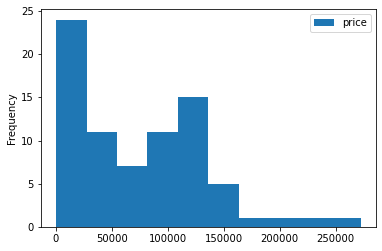

In [105]:
a.plot.hist()

In [48]:
df_panier = df_all.session_id.value_counts()
df_panier

s_118668    14
s_96857     13
s_21005     13
s_93892     12
s_168560    12
            ..
s_26281      1
s_73468      1
s_169637     1
s_131653     1
s_112349     1
Name: session_id, Length: 169194, dtype: int64

In [45]:
df_panier_prix = df_all.groupby('session_id').sum()
df_panier_prix

,price,categ,birth,year,age
session_id,,,,,
s_1,11.99,0.0,1967,2021,54
s_10,26.99,1.0,1970,2021,51
s_100,33.72,0.0,3956,4042,86
s_1000,39.22,0.0,7956,8084,128
s_10000,41.49,1.0,5967,6063,96
...,...,...,...,...,...
s_99994,28.92,0.0,5949,6063,114
s_99995,19.84,0.0,1960,2021,61
s_99996,56.27,0.0,7896,8084,188


In [46]:
df_panier_prix.describe()

,price,categ,birth,year,age
count,169194.000000,169194.000000,169194.000000,169194.000000,169194.000000
mean,34.259949,0.856053,3937.270618,4023.570688,86.300070
std,31.872846,0.980718,2525.290588,2575.499546,58.267115
min,0.000000,0.000000,1929.000000,2021.000000,17.000000
25%,15.200000,0.000000,1971.000000,2021.000000,50.000000
50%,25.560000,1.000000,3918.000000,4042.000000,69.000000
75%,42.980000,1.000000,5898.000000,6063.000000,110.000000
max,539.230000,10.000000,27888.000000,28294.000000,858.000000


In [47]:
df_panier_age = df_all.groupby('session_id').count()
df_panier_age

,id_prod,date,client_id,price,categ,sex,birth,day,month,hour,year,date_2,hours,age
session_id,,,,,,,,,,,,,,
s_1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
s_10,1,1,1,1,1,1,1,1,1,1,1,1,1,1
s_100,2,2,2,2,2,2,2,2,2,2,2,2,2,2
s_1000,4,4,4,4,4,4,4,4,4,4,4,4,4,4
s_10000,3,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_99994,3,3,3,3,3,3,3,3,3,3,3,3,3,3
s_99995,1,1,1,1,1,1,1,1,1,1,1,1,1,1
s_99996,4,4,4,4,4,4,4,4,4,4,4,4,4,4
